In [1]:
import numpy as np
from pylab import imshow, show, savefig
import mahotas
import mahotas.demos
from PIL import Image
import requests
from io import BytesIO

In [2]:
# Load image of the crowds.
crowds = mahotas.demos.load('Wally')
x = Image.fromarray(crowds)
x.save("crowds.png")

#response = requests.get("https://cdn-images-1.medium.com/max/2000/1*7v_75ZGg1CTmWAw1rEgMHQ.jpeg")
#response = requests.get("https://i.ytimg.com/vi/SiYrSYd7mlc/maxresdefault.jpg")
#response = requests.get("http://cdn.thejournal.ie/media/2012/10/wally-4.jpg")
#crowds = Image.open(BytesIO(response.content))
#crowds.save("crowds.png")
#crowds = np.array(crowds)

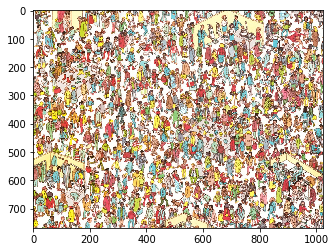

In [3]:
imshow(crowds)
show()

In [4]:
# We can use as_rgb, but later we will need floats, not int,
# so might as well use astype(float) now.
wfloat = crowds.astype(float)
np.shape(wfloat)

(768, 1024, 3)

In [5]:
# Get the rgb.
r,g,b = wfloat.transpose((2,0,1)) # can't use reshape.
np.shape(r)

(768, 1024)

In [6]:
# Get the white.
w = wfloat.mean(2) # third axis.
np.shape(w)

(768, 1024)

In [7]:
# Make pattern of shirt (-red, -red, +red, +red).
pattern = np.ones((24,16), float)
for i in range(2):
    pattern[i::4] = -1
pattern

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1

In [8]:
# Convolve red/white with the shirt pattern.
v = mahotas.convolve(r-w, pattern)
v

array([[ 7.10542736e-14, -4.26325641e-14, -1.98951966e-13, ...,
        -1.13686838e-13, -4.26325641e-14,  4.26325641e-14],
       [ 2.44666667e+02,  2.22333333e+02,  1.73666667e+02, ...,
         3.66666667e+00,  1.63333333e+01,  1.96666667e+01],
       [ 3.37333333e+02,  3.23666667e+02,  2.98333333e+02, ...,
        -2.16666667e+01, -1.33333333e+01, -7.66666667e+00],
       ...,
       [-3.26666667e+02, -2.95666667e+02, -3.18666667e+02, ...,
        -5.01333333e+02, -5.01666667e+02, -4.96666667e+02],
       [ 1.40000000e+01,  1.93333333e+01,  1.76666667e+01, ...,
        -4.44666667e+02, -4.47333333e+02, -4.36333333e+02],
       [ 2.60000000e+02,  2.39000000e+02,  2.66000000e+02, ...,
        -3.13666667e+02, -3.16666667e+02, -3.15000000e+02]])

In [9]:
# Get the region of the max response.
mask = (v == v.max())
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [10]:
# Dilate the region.
mask = mahotas.dilate(mask, np.ones((60,30)))
np.shape(mask)

(768, 1024)

In [11]:
# Tone down everything else.
waldo = crowds.astype(float)
waldo -= .5*waldo * ~mask[:,:,None]
waldo = np.uint8(waldo)
np.shape(waldo)

(768, 1024, 3)

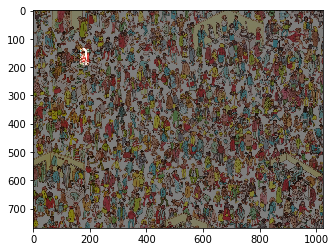

In [12]:
# Show.
imshow(waldo)
show()

In [13]:
# Save to file.
result =Image.fromarray(waldo)
result.save('waldo.png')